#  Task : Stock Price Prediction 

On Adani Power Stock By - Shubham Chaudhary

In [6]:
import pandas as pd
import pandas_datareader.data as pdr 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [13]:
df = pd.read_csv("D:/DataSets/Bharat Intern/Stock Price/adani.csv")

In [23]:
stock = "Adani"

In [9]:
#Setting the end date to today
end = datetime.datetime.now()
#Start date set to 1 year back
start = datetime.datetime(end.year-1,end.month,end.day) 

In [49]:
ls

 Volume in drive D is  Volume 1
 Volume Serial Number is 06E1-6380

 Directory of d:\DataSets\Bharat Intern\Stock Price

07/29/2023  10:34 PM    <DIR>          .
07/29/2023  01:16 AM    <DIR>          ..
07/29/2023  01:16 AM         3,068,832 adani.csv
07/29/2023  10:34 PM                 0 stock.ipynb
               2 File(s)      3,068,832 bytes
               2 Dir(s)  587,193,155,584 bytes free


In [14]:
df.head()

,timestamp,symbol,company,open,high,low,close,volume,dividends,stock_splits
0,1025461800000000000,ACC,ACC Limited,107.789,109.810,107.115,108.968,659631,0.0,0.0
1,1025461800000000000,AMBUJACEM,Ambuja Cements Limited,17.278,17.660,17.202,17.573,630442,0.0,0.0
2,1025461800000000000,ADANIENT,Adani Enterprises Limited,-0.010,-0.011,-0.010,-0.010,1080397,0.0,0.0
3,1025548200000000000,ACC,ACC Limited,108.496,110.046,107.789,108.059,282660,0.0,0.0
4,1025548200000000000,AMBUJACEM,Ambuja Cements Limited,17.573,17.748,17.409,17.560,1007265,0.0,0.0


In [15]:
df.describe()

,timestamp,open,high,low,close,volume,dividends,stock_splits
count,3.149700e+04,31497.000000,31497.000000,31497.000000,31497.000000,3.149700e+04,31497.000000,31497.000000
mean,1.409762e+18,404.542261,411.745505,396.689603,404.171407,3.594056e+06,0.017824,0.000381
std,1.817938e+17,623.108375,633.783423,610.711441,622.359535,7.932287e+06,0.530637,0.041405
min,1.025462e+18,-0.011000,-0.011000,-0.011000,-0.011000,0.000000e+00,0.000000,0.000000
25%,1.267036e+18,59.423000,60.773000,58.000000,59.238000,3.934800e+05,0.000000,0.000000
50%,1.434911e+18,140.100000,143.201000,137.100000,139.993000,1.347016e+06,0.000000,0.000000
75%,1.569868e+18,384.277000,392.376000,377.043000,384.034000,3.874840e+06,0.000000,0.000000
max,1.677091e+18,4175.000000,4236.750000,4066.400000,4165.300000,2.421999e+08,58.000000,5.000000


Table 1. Descriptive statistics of Square stock that shows price and volume. 

In [17]:
df.dtypes


timestamp         int64
symbol           object
company          object
open            float64
high            float64
low             float64
close           float64
volume            int64
dividends       float64
stock_splits    float64
dtype: object

In [19]:
df['typical_price'] = ((df['high'] +df['low'] + df['close']) / 3)

df['100ma'] = df['typical_price'].rolling(window=100, min_periods = 0).mean()

df['100sd'] = df['typical_price'].rolling(window=100, min_periods = 0).std()
df.head()

,timestamp,symbol,company,open,high,low,close,volume,dividends,stock_splits,typical_price,100ma,100sd
0,1025461800000000000,ACC,ACC Limited,107.789,109.810,107.115,108.968,659631,0.0,0.0,108.631000,108.631000,NaN
1,1025461800000000000,AMBUJACEM,Ambuja Cements Limited,17.278,17.660,17.202,17.573,630442,0.0,0.0,17.478333,63.054667,64.454669
2,1025461800000000000,ADANIENT,Adani Enterprises Limited,-0.010,-0.011,-0.010,-0.010,1080397,0.0,0.0,-0.010333,42.033000,58.334669
3,1025548200000000000,ACC,ACC Limited,108.496,110.046,107.789,108.059,282660,0.0,0.0,108.631333,58.682583,58.115892
4,1025548200000000000,AMBUJACEM,Ambuja Cements Limited,17.573,17.748,17.409,17.560,1007265,0.0,0.0,17.572333,50.460533,53.582676


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31496 entries, 1 to 31496
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      31496 non-null  int64  
 1   symbol         31496 non-null  object 
 2   company        31496 non-null  object 
 3   open           31496 non-null  float64
 4   high           31496 non-null  float64
 5   low            31496 non-null  float64
 6   close          31496 non-null  float64
 7   volume         31496 non-null  int64  
 8   dividends      31496 non-null  float64
 9   stock_splits   31496 non-null  float64
 10  typical_price  31496 non-null  float64
 11  100ma          31496 non-null  float64
 12  100sd          31496 non-null  float64
 13  pct_change     31496 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 4.6+ MB


In [51]:
df.isnull()

,timestamp,symbol,company,open,high,low,close,volume,dividends,stock_splits,typical_price,100ma,100sd,pct_change
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31492,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31493,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31494,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31495,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
df.isnull().sum()


timestamp        0
symbol           0
company          0
open             0
high             0
low              0
close            0
volume           0
dividends        0
stock_splits     0
typical_price    0
100ma            0
100sd            0
pct_change       0
dtype: int64

# EDA

Text(0, 0.5, 'Prices ($)')

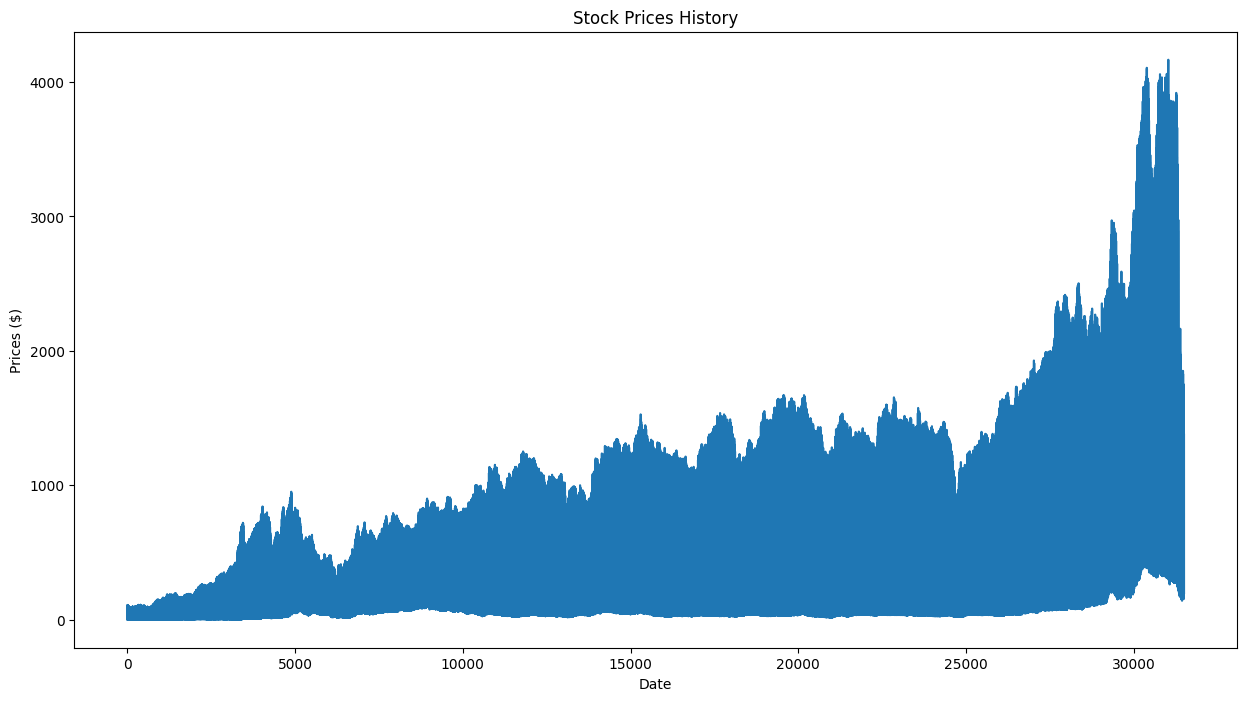

In [54]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [57]:
#Pie chart
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

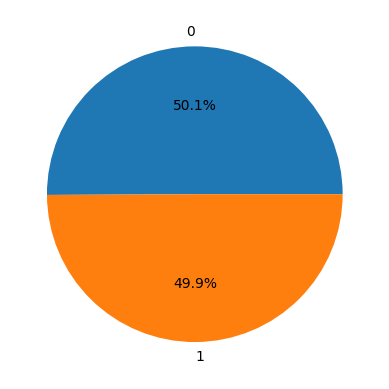

In [58]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

Normalizing the Dataset.

In [61]:
df1 = df.reset_index()['close']

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1
     

array([[4.22153352e-03],
       [2.40078112e-07],
       [2.59452415e-02],
       ...,
       [3.31946642e-01],
       [1.89988455e-01],
       [4.78021929e-02]])

Data Preprocessing

In [63]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(23622, 7874)

In [64]:
# Modelling
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

In [74]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return np.array(data_x), np.array(data_y)

In [75]:
time_step = 100
x_train , y_train = create_dataset(train_data, time_step)
x_test , y_test = create_dataset(test_data, time_step)

In [76]:
x_train

array([[4.22153352e-03, 2.40078112e-07, 2.59452415e-02, ...,
        3.36013325e-03, 3.36013325e-03, 2.20554960e-02],
       [2.40078112e-07, 2.59452415e-02, 4.21841250e-03, ...,
        3.36013325e-03, 2.20554960e-02, 4.80156224e-07],
       [2.59452415e-02, 4.21841250e-03, 0.00000000e+00, ...,
        2.20554960e-02, 4.80156224e-07, 4.80156224e-07],
       ...,
       [3.44519773e-01, 1.20665660e-02, 3.47020907e-02, ...,
        3.09199001e-02, 3.62911917e-01, 4.38906002e-02],
       [1.20665660e-02, 3.47020907e-02, 3.42819540e-02, ...,
        3.62911917e-01, 4.38906002e-02, 3.47258584e-02],
       [3.47020907e-02, 3.42819540e-02, 8.67896779e-02, ...,
        4.38906002e-02, 3.47258584e-02, 1.54396634e-02]])

In [77]:
x_test

array([[0.01482746, 0.01356705, 0.09462295, ..., 0.09581734, 0.04168956,
        0.00738504],
       [0.01356705, 0.09462295, 0.05386417, ..., 0.04168956, 0.00738504,
        0.09875613],
       [0.09462295, 0.05386417, 0.04300831, ..., 0.00738504, 0.09875613,
        0.0446867 ],
       ...,
       [0.10556499, 0.13980013, 0.46232106, ..., 0.12294664, 0.0370587 ,
        0.08088496],
       [0.13980013, 0.46232106, 0.05194354, ..., 0.0370587 , 0.08088496,
        0.13248975],
       [0.46232106, 0.05194354, 0.44341491, ..., 0.08088496, 0.13248975,
        0.33194664]])

In [78]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Stacked LSTM Model

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

from keras.layers import Dropout,  Bidirectional

In [69]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Fitting the model

model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
736/736 [==============================] - 38s 48ms/step - loss: 0.0064 - val_loss: 0.3930
Epoch 2/50
736/736 [==============================] - 35s 48ms/step - loss: 0.0060 - val_loss: 0.1628
Epoch 3/50
736/736 [==============================] - 35s 48ms/step - loss: 0.0059 - val_loss: 0.1016
Epoch 4/50
736/736 [==============================] - 35s 47ms/step - loss: 0.0058 - val_loss: 0.0793
Epoch 5/50
736/736 [==============================] - 34s 47ms/step - loss: 0.0058 - val_loss: 0.0816
Epoch 6/50
736/736 [==============================] - 33s 45ms/step - loss: 0.0058 - val_loss: 0.1000
Epoch 7/50
736/736 [==============================] - 34s 46ms/step - loss: 0.0058 - val_loss: 0.0650
Epoch 8/50
736/736 [==============================] - 34s 46ms/step - loss: 0.0058 - val_loss: 0.0878
Epoch 9/50
736/736 [==============================] - 34s 46ms/step - loss: 0.0058 - val_loss: 0.1026
Epoch 10/50
736/736 [==============================] - 34s 46ms/step - loss: 0.005

Prediction

In [80]:
test_predict = model.predict(x_test)
train_predict = model.predict(x_train)

736/736 [==============================] - 10s 14ms/step


In [81]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [82]:
back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict
     

In [84]:
# Test predictions
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict

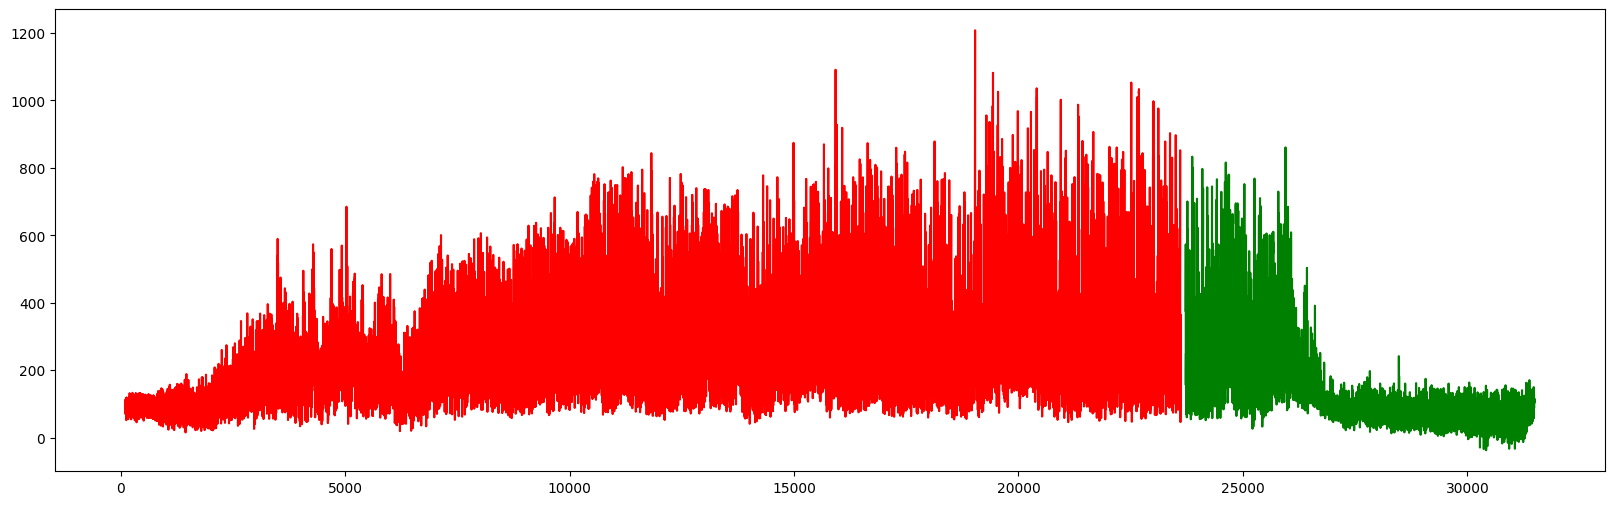

In [93]:
plt.subplots(figsize=(20,6))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

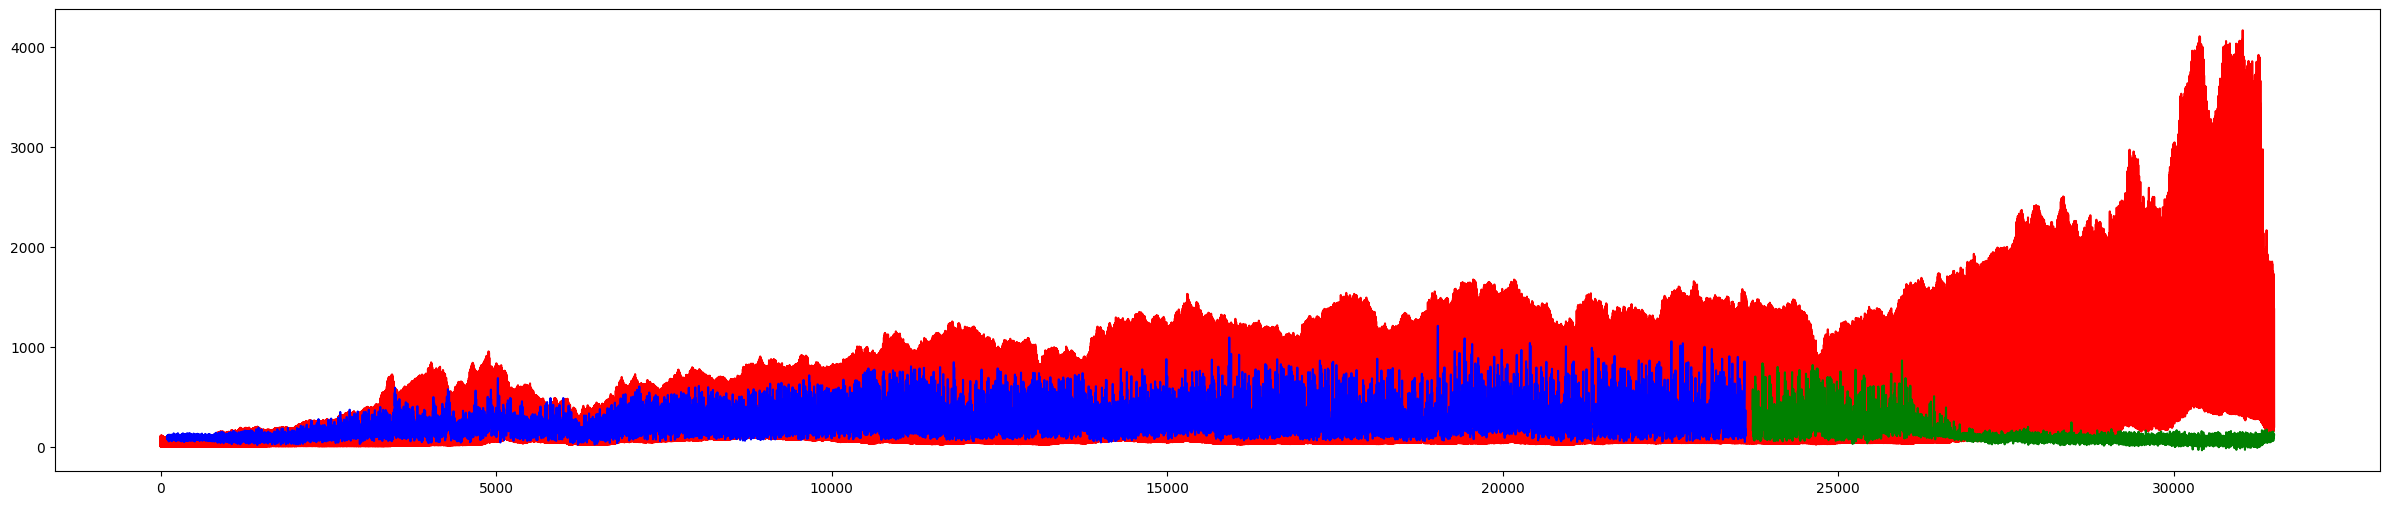

In [96]:
# Baseline and predictions
plt.subplots(figsize=(30,6))
plt.plot(scaler.inverse_transform(df1), color = 'red')
plt.plot(trainPredictPlot, color = 'blue')
plt.plot(testPredictPlot, color = 'green')
plt.show()

Confusion matrix

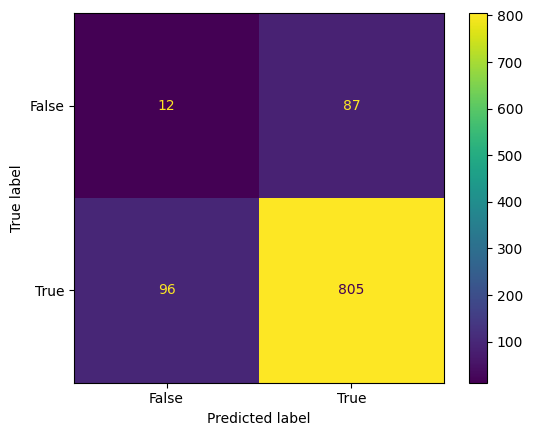

In [87]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Visualize price action and bollinger bands across trading day and typical price. On the bottom is a bar chart visualizing trading volume for each day.

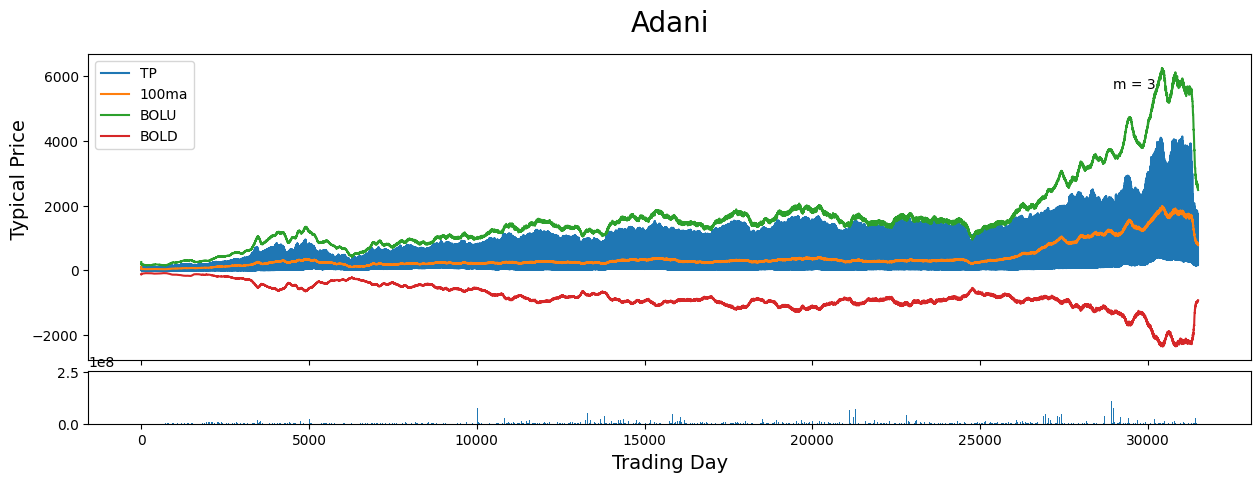

In [24]:
f = plt.figure()
f.set_figwidth(15)
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['typical_price'])
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, df['100ma'] + df['100sd'] * m) 
ax1.plot(df.index, df['100ma'] - df['100sd'] * m)
ax2.bar(df.index, df['volume'])
ax1.legend(["TP", "100ma", "BOLU", "BOLD"])
plt.xlabel("Trading Day", fontsize=14)
plt.ylabel( " " * 70 + "Typical Price", labelpad=20, fontsize = 14)
ax1.text(0.90, 0.90, "m = " + str(m), horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.5, 1.1, stock, horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes, fontsize=20)
graph = plt.show()

# Monte Carlo Simulation

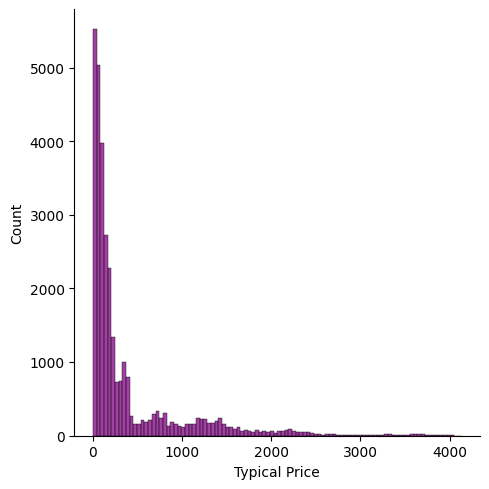

In [25]:
figure_2 = sns.displot(df['typical_price'].dropna(),bins=100,color='purple');
figure_2 = figure_2.set_axis_labels(x_var="Typical Price")